import some Prerequisites

In [0]:
from keras.datasets import mnist
from keras.models import Sequential,save_model,load_model
from keras.layers import Dense
from matplotlib import pyplot as plt
import numpy as np
import random

load and prepare MNIST dataset

In [0]:
(X_train, _ ), (X_test, _ ) = mnist.load_data()
X_test = X_test.reshape(10000,784)
X_train = X_train.reshape(60000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = np.around(X_train / 255)
X_test = np.around(X_test / 255)

build autoencoder

In [12]:
autoencoder = Sequential()

# Add a dense layer with the original image as input
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))
# Add an output layer with as many nodes as the image
autoencoder.add(Dense(784, activation="sigmoid"))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['acc'])
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


train autoencoder

In [13]:
history = autoencoder.fit(X_train,X_train,epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2238 - acc: 0.9002
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1430 - acc: 0.9405
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.1154 - acc: 0.9530
Epoch 4/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0975 - acc: 0.9610
Epoch 5/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0862 - acc: 0.9658
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0795 - acc: 0.9685
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0755 - acc: 0.9699
Epoch 8/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0731 - acc: 0.9708
Epoch 9/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0716 - acc: 0.9713
Epoch 10/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0705 - acc: 0.9717

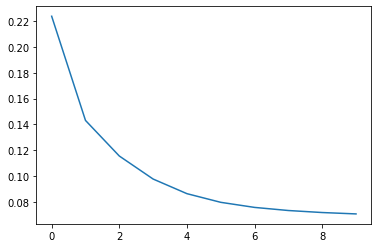

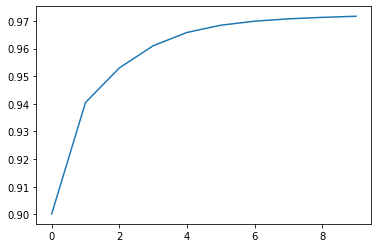

In [14]:
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['acc'])
plt.show()

build encoder

In [0]:
encoder = Sequential()
encoder.add(autoencoder.layers[0])
save_model(encoder,'encoder.hdf5')

build decoder

In [0]:
decoder = Sequential()
decoder.add(autoencoder.layers[1])
save_model(decoder,'decoder.hdf5')

# some usages of autoencoder

**1.compressing**

compress

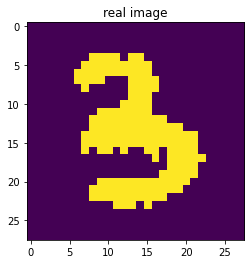

encoded to :[ 7.469024   6.2279525  7.036956   8.660095  14.406961  22.41591
 13.077379   8.099631  23.564701  11.936352   8.0381155 16.866533
 14.836622  17.565327  19.025686   5.1955566 14.622426  14.231044
 21.538416  20.083342   3.8446827  6.17986   20.82823   21.959705
  4.39561   12.732374  11.162942   9.982211  13.178375   8.707627
 11.115441   8.44736  ] 




In [17]:
ind = random.randint(0,10000) 

plt.imshow(np.reshape(X_test[ind],(28,28)))
plt.title('real image')
plt.show()

encoded_img = encoder.predict(np.array([X_test[ind]]))
print('encoded to :{} \n\n'.format(encoded_img[0]))


decompress

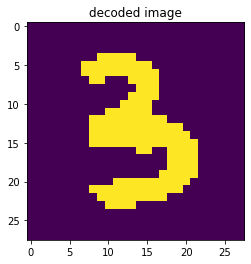

In [18]:
decoded_img = np.reshape(np.round(decoder.predict( np.array ( [encoded_img[0]] ) )),(28,28))
plt.imshow(decoded_img)
plt.title('decoded image')
plt.show()

**2.DeNoise**

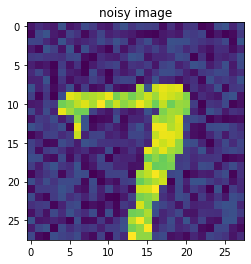

In [41]:
ind = random.randint(0,10000) 

test_img = np.reshape(X_test[ind],(28,28))
noisy_img = test_img+test_img.std()*np.random.random(test_img.shape)
plt.imshow(noisy_img)
plt.title('noisy image')
plt.show()

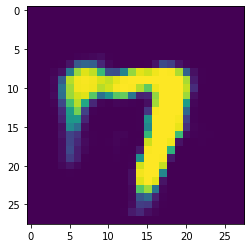

In [48]:
 result_image = autoencoder.predict( np.array( [np.reshape(noisy_img,(784,))] ))
 result_image = np.reshape(result_image,(28,28))
 plt.imshow(result_image)